#機械学習スクラッチ入門

## 【事前準備】

In [1]:
# scikit-learnの「set_config(display="diagram")」を使用するため、scikitlearnを最新verに更新
# !pip install scikit-learn==0.23.2 --target drive/My\ Drive/MyModule
# !pip install scikit-learn==0.23.2
# !pip list
## Google Drive上にインストールしたモジュールのインポート##
import sys
sys.path.append('/content/drive/My Drive/MyModule')

In [2]:
## モジュールのインポート ##
# 一般
import random
# データ分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
# その他
from google.colab import drive #GoogleDriveモジュール
drive.mount('/content/drive') #GoogleDriveのマウント

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 【問題1】train_test_split のスクラッチ
まずは、scikit-learnの train_test_split をスクラッチしてみます。以下の雛形をベースに関数を実装してください。




なお、作成した関数がscikit-learnの train_test_split と同じ動作をするか必ず確認をしましょう。

In [3]:
def scratch_train_test_split(arg_X, arg_y, arg_train_size=0.8, arg_random_state=None):
    """検証データを分割する。
    Parameters
    ----------
    arg_X : ndarray
      訓練データ (n_samples, n_features)
    arg_y : ndarray
      正解値 (n_samples,)
    arg_train_size : float
      何割をtrainとするか指定 (0 < train_size < 1)
    Returns
    -------
    ret_X_train : ndarray
      訓練データ (n_samples, n_features)
    ret_X_test : ndarray
      検証データ (n_samples, n_features)
    ret_y_train : ndarray
      訓練データの正解値 (n_samples,)
    ret_y_test : ndarray
      検証データの正解値 (n_samples,)
    """  
    #arg_Xとarg_yの行数が不一致ならエラーを出力し、関数を抜ける
    if arg_X.shape[0] != arg_y.shape[0]:
        print("Warning: Xとyのデータ数が不一致です。処理を中断します。")
        return

    # arg_Xの行数分の整数の乱数を作り、それをarg_Xとarg_yのインデックスにセットしてndarrayを並び替える
    np.random.seed(arg_random_state) #乱数シードを設定
    index_list = list(range(arg_X.shape[0]))
    np.random.shuffle(index_list)
    temp_X = arg_X[index_list, :]
    temp_y = arg_y[index_list]

    #学習データの数を算出し、Xとyを学習データと検証データに分割
    temp_train_num = int(arg_X.shape[0] * arg_train_size)
    
    ret_X_train = temp_X[:temp_train_num, :]  #学習データ(X)
    ret_y_train = temp_y[:temp_train_num]     #学習データ(y)
    ret_X_test = temp_X[temp_train_num:, :]   #検証データ(X)
    ret_y_test = temp_y[temp_train_num:]      #検証データ(y)
    
    return ret_X_train, ret_X_test, ret_y_train, ret_y_test

In [4]:
# scratch_train_test_split関数の動作確認
X = np.arange(1, 21).reshape(10, 2)
y = np.arange(21, 31)

print("X:")
print(X)
print("y:")
print(y)

X_train1, X_test1, y_train1, y_test1 = scratch_train_test_split(X, y, arg_train_size = 0.75, arg_random_state=0)

print("X_train1:")
print(X_train1)
print("X_test1:")
print(X_test1)
print("y_train1:")
print(y_train1)
print("y_test1:")
print(y_test1)

X:
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]
y:
[21 22 23 24 25 26 27 28 29 30]
X_train1:
[[ 5  6]
 [17 18]
 [ 9 10]
 [19 20]
 [ 3  4]
 [13 14]
 [15 16]]
X_test1:
[[ 7  8]
 [ 1  2]
 [11 12]]
y_train1:
[23 29 25 30 22 27 28]
y_test1:
[24 21 26]


In [5]:
# train_test_split関数との比較

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.75, random_state=0)

print("X_train2:")
print(X_train2)
print("X_test2:")
print(X_test2)
print("y_train2:")
print(y_train2)
print("y_test2:")
print(y_test2)

X_train2:
[[19 20]
 [ 3  4]
 [13 14]
 [15 16]
 [ 7  8]
 [ 1  2]
 [11 12]]
X_test2:
[[ 5  6]
 [17 18]
 [ 9 10]]
y_train2:
[30 22 27 28 24 21 26]
y_test2:
[23 29 25]


### 【問題1 解答】
自作したscratch_train_test_split関数が、train_test_split関数と同様にデータセットを分割可能であることを確認できた。

## 【問題2】 分類問題を解くコードの作成
上記3種類の手法で3種類のデータセットを学習・推定するコードを作成してください。

#### ●データセットの準備

In [6]:
## [データセット１] アヤメのデータセット ##
np.set_printoptions(threshold=100)   #配列の表示数上限の設定

from sklearn.datasets import load_iris
iris = load_iris()
print("iris.target_names: {}".format(iris.target_names))

df_X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(data=iris.target, columns=["species"])
df_iris_org = pd.concat([df_X, df_y], axis=1)

pd.set_option('display.max_rows', 10)    #DataFrameの行の表示数上限の設定
pd.set_option('display.max_columns', 5)   #DataFrameの列の表示数上限の設定

print("\n")
print("df_iris_org:")
display(df_iris_org)


#目的変数（正解ラベル）をvirgicolorとvirginicaのみに削減する。（Setosaのデータ行を削除する）
df_1 = df_iris_org[df_iris_org.loc[:, "species"]==1]
df_2 = df_iris_org[df_iris_org.loc[:, "species"]==2]
df_iris = pd.concat([df_1, df_2], axis=0)
df_iris["sepal length (cm)"] = (df_iris["sepal length (cm)"]*100000 + 100000)
print("\n")
print("df_iris:")
display(df_iris)

X = np.array(df_iris.iloc[:, :-1])
y = np.array(df_iris.iloc[:, -1])

#データセットを学習用と検証用に分割
X_train1, X_test1, y_train1, y_test1 = scratch_train_test_split(X, y, arg_train_size = 0.75, arg_random_state=0)

iris.target_names: ['setosa' 'versicolor' 'virginica']


df_iris_org:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2




df_iris:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,800000.0,3.2,4.7,1.4,1
51,740000.0,3.2,4.5,1.5,1
52,790000.0,3.1,4.9,1.5,1
53,650000.0,2.3,4.0,1.3,1
54,750000.0,2.8,4.6,1.5,1
...,...,...,...,...,...
145,770000.0,3.0,5.2,2.3,2
146,730000.0,2.5,5.0,1.9,2
147,750000.0,3.0,5.2,2.0,2
148,720000.0,3.4,5.4,2.3,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.494305
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.308080
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.786424
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


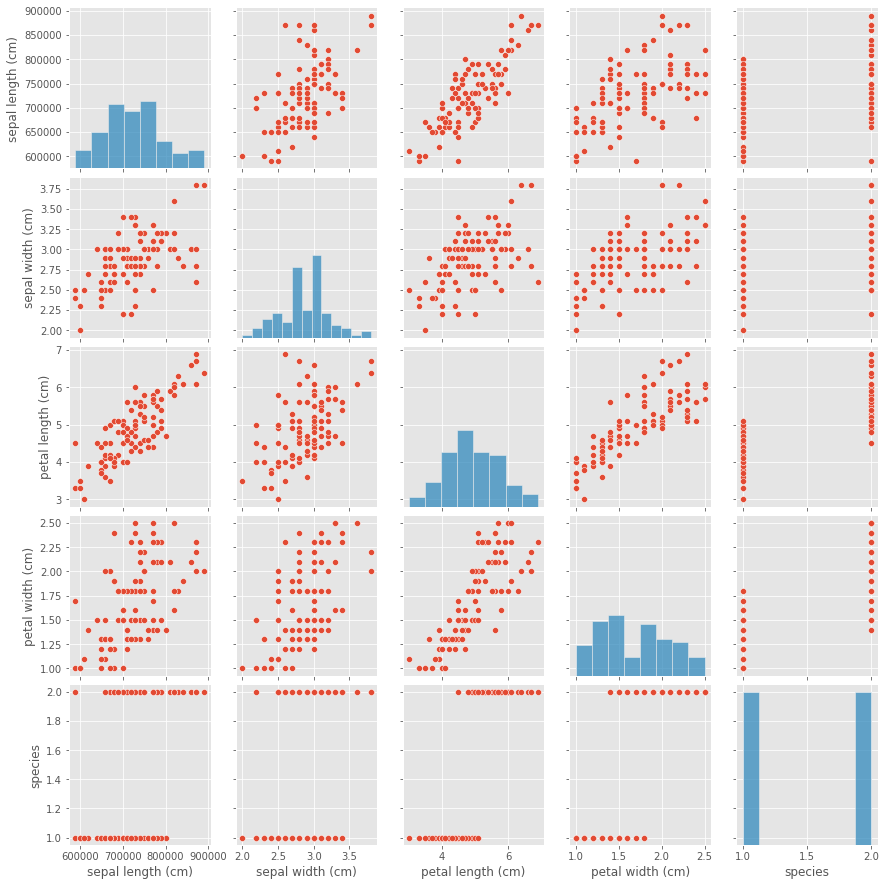

In [7]:
#相関係数
display(df_iris.corr())

#散布図行列を作成
import seaborn as sns
sns.pairplot(df_iris, diag_kind="hist");

In [8]:
## [データセット２] シンプルデータセット1 ##
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
X = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])

df_X = pd.DataFrame(data=X, columns=["X0", "X1"])
df_y = pd.DataFrame(data=y, columns=["y"])
df_simple1 = pd.concat([df_X, df_y], axis=1)

print("df_simple1:")
display(df_simple1)

#データセットを学習用と検証用に分割
X_train2, X_test2, y_train2, y_test2 = scratch_train_test_split(X, y, arg_train_size = 0.75, arg_random_state=0)

df_simple1:


,X0,X1,y
0,-2.800068,0.453014,1
1,-2.637145,1.780120,1
2,-2.462679,-0.080763,1
3,-1.853470,1.050804,1
4,-1.031921,2.227765,1
...,...,...,...
495,1.525060,-1.361861,-1
496,2.682255,-0.165458,-1
497,1.595155,-1.143723,-1
498,2.158431,-0.781996,-1


,X0,X1,y
X0,1.000000,-0.471745,-0.842276
X1,-0.471745,1.000000,0.836915
y,-0.842276,0.836915,1.000000


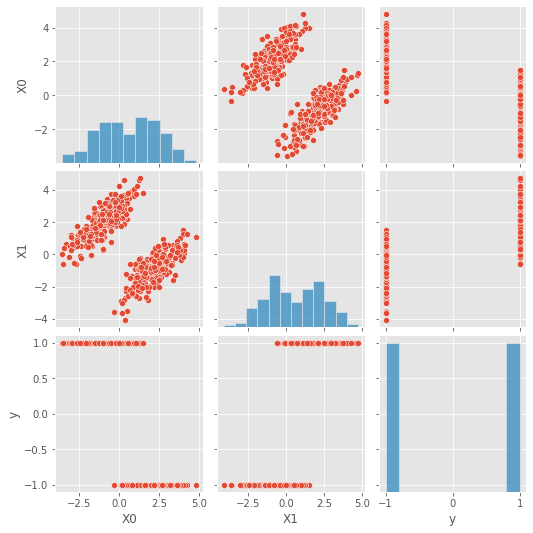

In [9]:
#相関係数
display(df_simple1.corr())

#散布図行列を作成
import seaborn as sns
sns.pairplot(df_simple1, diag_kind="hist");

In [10]:
## [データセット３] シンプルデータセット2 ##
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

df_X = pd.DataFrame(data=X, columns=["X0", "X1"])
df_y = pd.DataFrame(data=y, columns=["y"])
df_simple2 = pd.concat([df_X, df_y], axis=1)

print("df_simple2:")
display(df_simple2)

#データセットを学習用と検証用に分割
X_train3, X_test3, y_train3, y_test3 = scratch_train_test_split(X, y, arg_train_size = 0.75, arg_random_state=0)

df_simple2:


,X0,X1,y
0,-0.446990,-2.80730,0
1,-1.462100,-2.45860,0
2,0.106450,1.92420,0
3,-3.594400,-4.01120,0
4,-0.988800,4.57180,0
...,...,...,...
35,-2.353000,-0.72261,1
36,1.131900,2.40230,1
37,-0.122430,9.01620,1
38,-2.567700,13.17790,1


,X0,X1,y
X0,1.000000,0.292602,0.053205
X1,0.292602,1.000000,0.322704
y,0.053205,0.322704,1.000000


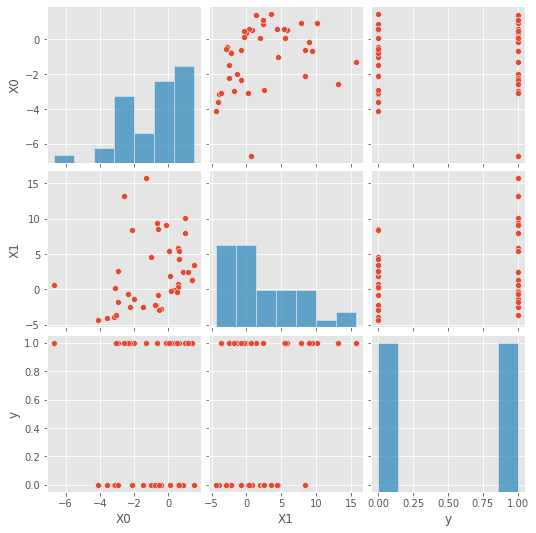

In [11]:
#相関係数
display(df_simple2.corr())

#散布図行列を作成
import seaborn as sns
sns.pairplot(df_simple2, diag_kind="hist");

#### ●学習・推定・評価


In [12]:
## 推定器の指標値を記録するスコアボードのクラス ##
class ScoreBoard():
    def __init__(self, name=None):
        self.df_score = pd.DataFrame([])   #各指標値を記録するDataFrame
        self.name = name
        print("「{}」スコアボードが生成されました。".format(self.name))
    def calcurate_scores(self, arg_y_true, arg_y_predict, arg_y_predict_proba, arg_columns):
        # Accuracy（正解率）
        accuracy = accuracy_score(arg_y_true, arg_y_predict)

        #Precision（適合率）
        precision = precision_score(arg_y_true, arg_y_predict)

        #Recall（再現率）
        recall = recall_score(arg_y_true, arg_y_predict)

        #F値
        f1 = f1_score(arg_y_true, arg_y_predict)

        #AUC
        roc_auc = roc_auc_score(arg_y_true, arg_y_predict_proba)

        #Confusion matrix（混同行列）
        print("\n")
        print("###Confusion matrix（混同行列）###")
        print(confusion_matrix(arg_y_true, arg_y_predict))

        #指標値の比較用テーブルに登録
        # if(self.df_score.empty):
        #     self.df_score = pd.DataFrame([accuracy, precision, recall, f1, roc_auc], index=["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"], columns=arg_columns)
        # else:
        df_score_temp = pd.DataFrame([accuracy, precision, recall, f1, roc_auc], index=["Accuacy", "Precision", "Recall", "F1", "ROC_AUC"], columns=arg_columns)
        self.df_score = pd.concat([self.df_score, df_score_temp], axis=1)
        print("\n")
        print("「{}」スコアボード:".format(self.name))
        display(self.df_score)

        # #ROC曲線、AUC
        # #y_testの値を2→1, 1→0に変換
        # y_test1_dummy = np.where(y_test1==1, 0, 1)
        # fpr, tpr, thresholds = metrics.roc_curve(y_test1_dummy, y_predict_proba[:, -1]) # FPR（偽陽性率）、TPR（真陽性率）、閾値を算出
        # auc = metrics.auc(fpr, tpr)  # AUCを算出
        # plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
        # plt.legend()
        # plt.title('ROC curve')
        # plt.xlabel('False Positive Rate')
        # plt.ylabel('True Positive Rate')
        # plt.grid(True)

        # 決定領域を描画
        # decision_region(X_train_transformed, y_train, model=clf, step=0.01, title='decision region', xlabel=df3.columns[0], ylabel=df3.columns[1], target_names=df3.iloc[:, -1].unique())
        
        return

# スコアボードをインスタンス化
score_board1 = ScoreBoard("データセット1用") #データセット1用
score_board2 = ScoreBoard("データセット2用") #データセット2用
score_board3 = ScoreBoard("データセット3用") #データセット3用
score_board4 = ScoreBoard("データセット4用") #データセット4用

「データセット1用」スコアボードが生成されました。
「データセット2用」スコアボードが生成されました。
「データセット3用」スコアボードが生成されました。
「データセット4用」スコアボードが生成されました。


##### ・ロジスティック回帰(SGDClassifier)

In [13]:
# 標準化処理とロジスティック回帰をパイプラインに組み込み
pipeline_logisticreg = Pipeline(steps=[
    ("scaler", StandardScaler()),      #変換器
    ("classifier", SGDClassifier(loss="log", max_iter=1000, tol=1e-3, random_state=0)) #予測器（推定器）
])
# pipeline_logisticreg = SGDClassifier(loss="log", max_iter=1000, tol=1e-3, random_state=0)

# データセット1に対して学習・推定・評価
X = X_train1
Xt = X_test1
y = y_train1
pipeline_logisticreg.fit(X, y)
y_predict = pipeline_logisticreg.predict(Xt)
y_predict_proba = pipeline_logisticreg.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board1.calcurate_scores(y_test1, y_predict, y_predict_proba[:, -1], ["LOGI1"])

y_predict:
[2 2 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1]
y_predict_proba:
[[1.53635564e-01 8.46364436e-01]
 [3.83045069e-02 9.61695493e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [2.59422134e-03 9.97405779e-01]
 [1.00000000e+00 2.97118963e-20]
 [1.00000000e+00 2.81637946e-17]
 [3.77475828e-15 1.00000000e+00]
 [1.00000000e+00 2.68151701e-19]
 [1.00000000e+00 6.71856005e-19]
 [0.00000000e+00 1.00000000e+00]
 [1.55431223e-15 1.00000000e+00]
 [1.00000000e+00 4.86280438e-29]
 [1.76702421e-02 9.82329758e-01]
 [0.00000000e+00 1.00000000e+00]
 [6.50835830e-10 9.99999999e-01]
 [1.00000000e+00 4.01760517e-14]
 [1.00000000e+00 1.27029536e-24]
 [9.98813235e-01 1.18676520e-03]
 [1.00000000e+00 1.20022852e-16]
 [8.47455828e-09 9.99999992e-01]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 3.10418424e-21]
 [1.00000000e+00 1.45127332e-17]]


###Confusion matrix（混同行列）###
[[10  1]
 [ 1 13]]


「データセット1用」スコアボード:


,LOGI1
Accuacy,0.920000
Precision,0.909091
Recall,0.909091
F1,0.909091
ROC_AUC,0.987013


In [14]:
# データセット2に対して学習・推定・評価
X = X_train2
Xt = X_test2
y = y_train2
pipeline_logisticreg.fit(X, y)
y_predict = pipeline_logisticreg.predict(Xt)
y_predict_proba = pipeline_logisticreg.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board2.calcurate_scores(y_test2, y_predict, y_predict_proba[:, -1], ["LOGI1"])

y_predict:
[-1 -1  1 ...  1  1  1]
y_predict_proba:
[[9.99979882e-01 2.01182693e-05]
 [9.99984108e-01 1.58921654e-05]
 [3.91064884e-05 9.99960894e-01]
 ...
 [5.34312558e-05 9.99946569e-01]
 [5.08163975e-05 9.99949184e-01]
 [3.32812676e-04 9.99667187e-01]]


###Confusion matrix（混同行列）###
[[67  0]
 [ 0 58]]


「データセット2用」スコアボード:


,LOGI1
Accuacy,1.0
Precision,1.0
Recall,1.0
F1,1.0
ROC_AUC,1.0


In [15]:
# データセット3に対して学習・推定・評価
X = X_train3
Xt = X_test3
y = y_train3
pipeline_logisticreg.fit(X, y)
y_predict = pipeline_logisticreg.predict(Xt)
y_predict_proba = pipeline_logisticreg.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board3.calcurate_scores(y_test3, y_predict, y_predict_proba[:, -1], ["LOGI1"])

y_predict:
[1 1 1 1 1 1 1 1 1 1]
y_predict_proba:
[[1.86815157e-02 9.81318484e-01]
 [7.99672069e-03 9.92003279e-01]
 [4.84193211e-02 9.51580679e-01]
 [8.92767303e-04 9.99107233e-01]
 [5.17656428e-02 9.48234357e-01]
 [1.91622081e-02 9.80837792e-01]
 [5.20287009e-02 9.47971299e-01]
 [8.70051522e-04 9.99129948e-01]
 [2.21820730e-02 9.77817927e-01]
 [6.53824637e-02 9.34617536e-01]]


###Confusion matrix（混同行列）###
[[0 5]
 [0 5]]


「データセット3用」スコアボード:


,LOGI1
Accuacy,0.500000
Precision,0.500000
Recall,1.000000
F1,0.666667
ROC_AUC,0.880000


##### ・SVM

In [16]:
# 標準化処理とSVMをパイプラインに組み込み
pipeline_svc = Pipeline(steps=[
    ("scaler", StandardScaler()),      #変換器
    ("classifier", SVC(kernel="rbf", C=1000, random_state=0, gamma="scale", probability=True)) #予測器（推定器）
])
X = X_train1
Xt = X_test1
y = y_train1
pipeline_svc.fit(X, y)
y_predict = pipeline_svc.predict(Xt)
y_predict_proba = pipeline_svc.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board1.calcurate_scores(y_test1, y_predict, y_predict_proba[:, -1], ["SVM1"])

y_predict:
[1 2 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1]
y_predict_proba:
[[5.48316154e-01 4.51683846e-01]
 [2.25923158e-01 7.74076842e-01]
 [3.53568731e-02 9.64643127e-01]
 [2.09472973e-02 9.79052703e-01]
 [2.12217821e-01 7.87782179e-01]
 [9.81033654e-01 1.89663458e-02]
 [8.69690267e-01 1.30309733e-01]
 [1.12719694e-01 8.87280306e-01]
 [9.64699334e-01 3.53006664e-02]
 [9.46810577e-01 5.31894234e-02]
 [1.07378192e-02 9.89262181e-01]
 [9.72926006e-03 9.90270740e-01]
 [8.58690505e-01 1.41309495e-01]
 [1.75147744e-01 8.24852256e-01]
 [4.36285915e-02 9.56371408e-01]
 [2.44837583e-01 7.55162417e-01]
 [9.79945475e-01 2.00545249e-02]
 [9.61381904e-01 3.86180957e-02]
 [8.82320909e-01 1.17679091e-01]
 [7.44387491e-01 2.55612509e-01]
 [7.92232415e-02 9.20776759e-01]
 [1.07089282e-01 8.92910718e-01]
 [1.82748963e-06 9.99998173e-01]
 [9.84287218e-01 1.57127816e-02]
 [9.71891330e-01 2.81086700e-02]]


###Confusion matrix（混同行列）###
[[10  1]
 [ 2 12]]


「データセット1用」スコアボード:


,LOGI1,SVM1
Accuacy,0.920000,0.880000
Precision,0.909091,0.833333
Recall,0.909091,0.909091
F1,0.909091,0.869565
ROC_AUC,0.987013,0.961039


In [17]:
# データセット2に対して学習・推定・評価
X = X_train2
Xt = X_test2
y = y_train2
pipeline_svc.fit(X, y)
y_predict = pipeline_svc.predict(Xt)
y_predict_proba = pipeline_svc.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board2.calcurate_scores(y_test2, y_predict, y_predict_proba[:, -1], ["SVM1"])

y_predict:
[-1 -1  1 ...  1  1  1]
y_predict_proba:
[[0.99656736 0.00343264]
 [0.99486228 0.00513772]
 [0.0031818  0.9968182 ]
 ...
 [0.00643185 0.99356815]
 [0.00288885 0.99711115]
 [0.00328318 0.99671682]]


###Confusion matrix（混同行列）###
[[67  0]
 [ 0 58]]


「データセット2用」スコアボード:


,LOGI1,SVM1
Accuacy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
F1,1.0,1.0
ROC_AUC,1.0,1.0


In [18]:
# データセット3に対して学習・推定・評価
X = X_train3
Xt = X_test3
y = y_train3
pipeline_svc.fit(X, y)
y_predict = pipeline_svc.predict(Xt)
y_predict_proba = pipeline_svc.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board3.calcurate_scores(y_test3, y_predict, y_predict_proba[:, -1], ["SVM1"])

y_predict:
[1 1 1 1 1 0 0 1 0 0]
y_predict_proba:
[[0.5        0.5       ]
 [0.32316033 0.67683967]
 [0.5        0.5       ]
 [0.27100372 0.72899628]
 [0.48416309 0.51583691]
 [0.65820772 0.34179228]
 [0.52518155 0.47481845]
 [0.40888757 0.59111243]
 [0.56399819 0.43600181]
 [0.51519056 0.48480944]]


###Confusion matrix（混同行列）###
[[4 1]
 [0 5]]


「データセット3用」スコアボード:


,LOGI1,SVM1
Accuacy,0.500000,0.900000
Precision,0.500000,0.833333
Recall,1.000000,1.000000
F1,0.666667,0.909091
ROC_AUC,0.880000,0.980000


##### ・決定木

In [19]:
# 標準化処理と決定木をパイプラインに組み込み
pipeline_decision_tree = Pipeline(steps=[
    ("scaler", StandardScaler()),      #変換器
    ("classifier", DecisionTreeClassifier(random_state=0)) #予測器（推定器）
])
X = X_train1
Xt = X_test1
y = y_train1
pipeline_decision_tree.fit(X, y)
y_predict = pipeline_decision_tree.predict(Xt)
y_predict_proba = pipeline_decision_tree.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board1.calcurate_scores(y_test1, y_predict, y_predict_proba[:, -1], ["DecisionTree1"])

y_predict:
[1 2 2 2 2 1 1 2 1 1 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1]
y_predict_proba:
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


###Confusion matrix（混同行列）###
[[10  1]
 [ 2 12]]


「データセット1用」スコアボード:


,LOGI1,SVM1,DecisionTree1
Accuacy,0.920000,0.880000,0.880000
Precision,0.909091,0.833333,0.833333
Recall,0.909091,0.909091,0.909091
F1,0.909091,0.869565,0.869565
ROC_AUC,0.987013,0.961039,0.883117


In [20]:
# データセット2に対して学習・推定・評価
X = X_train2
Xt = X_test2
y = y_train2
pipeline_decision_tree.fit(X, y)
y_predict = pipeline_decision_tree.predict(Xt)
y_predict_proba = pipeline_decision_tree.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board2.calcurate_scores(y_test2, y_predict, y_predict_proba[:, -1], ["DecisionTree1"])

y_predict:
[-1 -1  1 ...  1  1  1]
y_predict_proba:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


###Confusion matrix（混同行列）###
[[67  0]
 [ 0 58]]


「データセット2用」スコアボード:


,LOGI1,SVM1,DecisionTree1
Accuacy,1.0,1.0,1.0
Precision,1.0,1.0,1.0
Recall,1.0,1.0,1.0
F1,1.0,1.0,1.0
ROC_AUC,1.0,1.0,1.0


In [21]:
# データセット3に対して学習・推定・評価
X = X_train3
Xt = X_test3
y = y_train3
pipeline_decision_tree.fit(X, y)
y_predict = pipeline_decision_tree.predict(Xt)
y_predict_proba = pipeline_decision_tree.predict_proba(Xt)

print("y_predict:")
print(y_predict)
print("y_predict_proba:")
print(y_predict_proba)

# 推定器のスコアを計算し、スコアボードに記録
score_board3.calcurate_scores(y_test3, y_predict, y_predict_proba[:, -1], ["DecisionTree1"])

y_predict:
[1 1 0 1 1 0 0 1 0 0]
y_predict_proba:
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


###Confusion matrix（混同行列）###
[[5 0]
 [0 5]]


「データセット3用」スコアボード:


,LOGI1,SVM1,DecisionTree1
Accuacy,0.500000,0.900000,1.0
Precision,0.500000,0.833333,1.0
Recall,1.000000,1.000000,1.0
F1,0.666667,0.909091,1.0
ROC_AUC,0.880000,0.980000,1.0


## 【問題3】 回帰問題を解くコードの作成
線形回帰でHouse Pricesデータセットを学習・推定するコードを作成してください。

#### ●データセットの準備

In [22]:
csv_path = "drive/My Drive/DIVE INTO CODE/Week3/train.csv" # ファイル名（パス）を指定する

import pandas as pd
df_train_org = pd.read_csv(csv_path)

# df_train = df_train_org.iloc[:10000, :]   #データ数を削減
df_train = df_train_org

#GrLivArea、YearBuilt、SalePrice列のみを抽出
df_train = df_train.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]

pd.set_option('display.max_rows', 150)    #最大表示行数を設定
pd.set_option('display.max_columns', 5)   #最大表示列数を設定

display(df_train)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


In [23]:
df_train.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [24]:
df_train.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [25]:
df_train.dtypes

GrLivArea    int64
YearBuilt    int64
SalePrice    int64
dtype: object

'df_train.corr():'

,GrLivArea,YearBuilt,SalePrice
GrLivArea,1.000000,0.199010,0.708624
YearBuilt,0.199010,1.000000,0.522897
SalePrice,0.708624,0.522897,1.000000


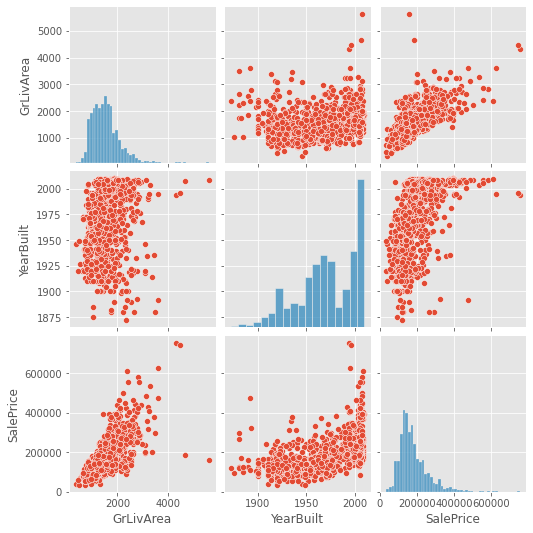

In [26]:
#相関行列
display("df_train.corr():")
display(df_train.corr())

#散布図行列を作成
import seaborn as sns
sns.pairplot(df_train, diag_kind="hist")

In [27]:
X = np.array(df_train.iloc[:, :-1])
y = np.array(df_train.iloc[:, -1])

#データセットを学習用と検証用に分割
X_train4, X_test4, y_train4, y_test4 = scratch_train_test_split(X, y, arg_train_size = 0.75, arg_random_state=0)

#### ●学習・推定・評価


##### ・線形回帰(SGDRegressor)

y_predict:
[189334.14113841 224262.35497225 221378.4292277  ... 224909.30989657
 218530.27791088 239850.46680894]


y_test(true):
[170000 270000 209500 ... 112000 234000 221000]
coef_
[50843.31680779 32257.56895978]
intercept_
[182898.12524562]
mean_scored_error(RMSE):
40327.05898685396


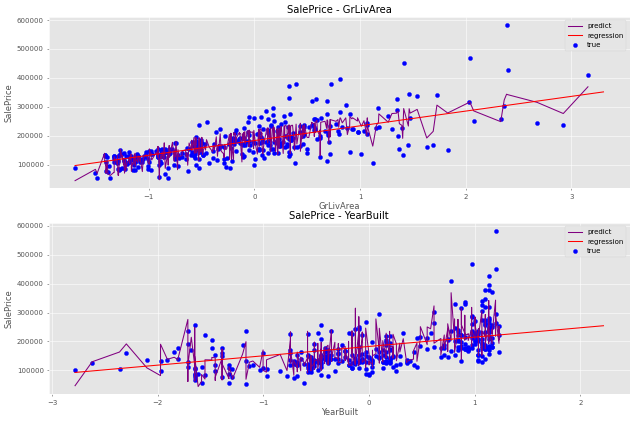

In [28]:
# 標準化処理と線形回帰をパイプラインに組み込み
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),      #変換器
    ("classifier", SGDRegressor(loss="squared_loss", max_iter=1000, tol=1e-3, random_state=0))  #推定器
])

# データセットに対して学習・推定・評価
X = X_train4
Xt = X_test4
y = y_train4
yt = y_test4
pipeline.fit(X, y)
y_predict = pipeline.predict(Xt)
print("y_predict:")
print(y_predict)
print("\n")
print("y_test(true):")
print(y_test4)

print("coef_")    # 説明変数の係数(傾き)
print(pipeline["classifier"].coef_)    # 説明変数の係数(傾き)
print("intercept_")   # 切片
print(pipeline["classifier"].intercept_)   # 切片

X_test_transformed = pipeline["scaler"].transform(X_test4)

#評価
mean_scored_error_linear = mean_squared_error(yt, y_predict, squared=False)   #RMSE
print("mean_scored_error(RMSE):")
print(mean_scored_error_linear)

#予測値と実測値をプロット
fig3, ax3 = plt.subplots(2, figsize=(15, 10), dpi=50)

ax3[0].set_title("SalePrice - GrLivArea")
ax3[0].set_xlabel("GrLivArea")
ax3[0].set_ylabel("SalePrice")
ax3[1].set_title("SalePrice - YearBuilt")
ax3[1].set_xlabel("YearBuilt")
ax3[1].set_ylabel("SalePrice")

#実測値をプロット（散布図）
ax3[0].scatter(X_test_transformed[:, 0], yt, c="blue", cmap='Blues', label="true")
ax3[1].scatter(X_test_transformed[:, 1], yt, c="blue", cmap='Blues', label="true")

#予測値をプロット（折れ線）
X_y_ndarray = np.concatenate([X_test_transformed, y_predict.reshape(-1, 1)], axis=1)
X_y_sort_col0_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 0])]  #0列目(X1)でソート
X_y_sort_col1_ndarray = X_y_ndarray[np.argsort(X_y_ndarray[:, 1])]  #1列目(X2)でソート
ax3[0].plot(X_y_sort_col0_ndarray[:, 0], X_y_sort_col0_ndarray[:, 2], color = "purple", label="predict")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
ax3[1].plot(X_y_sort_col1_ndarray[:, 1], X_y_sort_col1_ndarray[:, 2], color = "purple", label="predict")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

#回帰直線を作成
X1 = np.arange(np.min(X_test_transformed[:, 0]), np.max(X_test_transformed[:, 0]) + 1, 1)
y_predict_regression = pipeline["classifier"].coef_[0] * X1 + pipeline["classifier"].intercept_
ax3[0].plot(X1, y_predict_regression, color = "red", label="regression")
ax3[0].legend(loc='best') # 凡例を最適位置に表示
X2 = np.arange(np.min(X_test_transformed[:, 1]), np.max(X_test_transformed[:, 1]) + 1, 1)
y_predict_regression = pipeline["classifier"].coef_[1] * X2 + pipeline["classifier"].intercept_
ax3[1].plot(X2, y_predict_regression, color = "red", label="regression")
ax3[1].legend(loc='best') # 凡例を最適位置に表示

plt.show()